In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import math
%matplotlib notebook

In [2]:
def cepstrum_implement(x):
    
    p = np.poly1d(x)
    roots = p.r
    N = 500
    n_positive = np.arange(1,N+1).astype(np.float64)
    n_negative = np.arange(-N,0).astype(np.float64)
    
    cep_positive = np.arange(N+1,N+1+N)
    cep_negative = np.arange(0,N)
    cep = np.zeros(2*N+1).astype(np.complex128)
    
    minimum = 1e-6
    A = x[x>minimum][0]
    for value in roots:
        if abs(value) > minimum:
            if abs(value) < 1+minimum:
                cep[cep_positive] = cep[cep_positive]-np.power(value, n_positive)/n_positive
            else:
                cep[cep_negative] = cep[cep_negative]+np.power(1/value, -n_negative)/n_negative
                A = A*(-value)
    cep[N] = np.log(A)
    return cep

def inverse_cepstrum(cep1, output_length):
    Lm = output_length
    N = 500
    Lm1 = Lm*2+1
    flt = 1
    minimum = 1e-6
    
    gmx = 100
    gm = np.array([math.gamma(i+1) for i in range(gmx+1)])
    
    for a2 in range(N):
        a21 = N-a2
        if abs(cep1[a2])>minimum:
            ff = np.zeros(Lm+1).astype(np.complex128)
            md = np.min([Lm//a21,gmx])
            index = np.linspace(0,0+a21*md,num=md+1,endpoint=True).astype(np.int64)
            ff[index] = np.power(cep1[a2],np.arange(md+1))/gm[:md+1]
            flt = np.convolve(flt,ff)
            flt = flt[:Lm+1]

    exp_x = flt[np.arange(Lm,-1,-1)]*np.exp(cep1[N])
    xa = np.concatenate((exp_x, np.zeros(Lm)))
#     xa=[np.zeros(Lm),1,np.zeros(Lm)]
    for a3 in range(1,N+1):
        a31 = N+a3
        if abs(cep1[a31])>minimum:
            ff = np.zeros(Lm+1).astype(np.complex128)
            md = np.min([Lm//a3,gmx])
            index = np.linspace(0,0+a3*md,num=md+1,endpoint=True).astype(np.int64)
            ff[index]=np.power(cep1[a31],np.arange(md+1))/gm[:md+1]
            xa = np.convolve(xa,ff)
            xa = xa[:Lm1]
    return xa

In [79]:
fs = 102400
f = 5000
duration_count = int(fs/f*1)
# duration_count = int(fs*0.001)
time_s = (np.arange(duration_count)+1)/fs
# f = (8000-3000)/0.001*time_s + 3000

s = np.sin(2*np.pi*f*time_s)
# window = np.hanning(len(s))
window = np.ones(len(s))
window_s = s*window
duration_total = int(0.01*fs)
time = np.arange(duration_total)/fs
s_origin = np.concatenate((window_s, np.zeros(duration_total-len(s))))

In [80]:
time_delay_1 = 2/1500
alpha_1 = 0.5
s_1 = np.concatenate((np.zeros(int(time_delay_1*fs)), alpha_1*window_s))
s_1 = np.concatenate((s_1, np.zeros(duration_total-len(s_1))))

np.random.seed(0)
signal_distorted = s_origin + s_1 

<IPython.core.display.Javascript object>


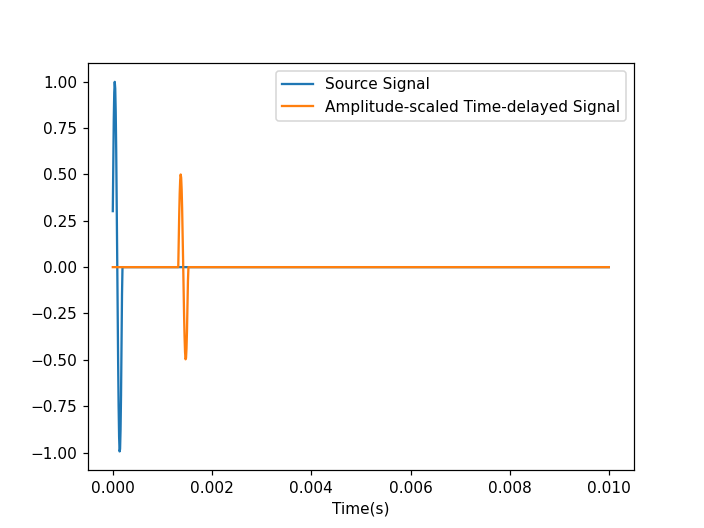

Text(0.5, 0, 'Time(s)')

In [81]:
fig, ax = plt.subplots()
ax.plot(time, s_origin, label="Source Signal")
ax.plot(time, s_1, label="Amplitude-scaled Time-delayed Signal")
ax.legend(loc=1)
ax.set_xlabel("Time(s)")

<IPython.core.display.Javascript object>


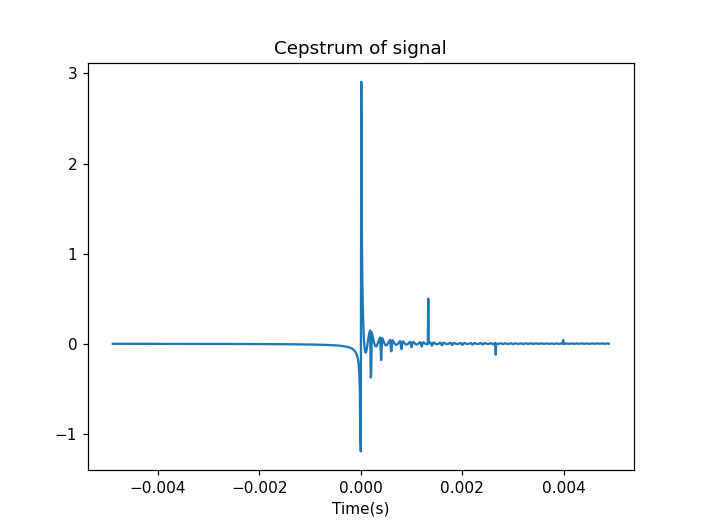

Text(0.5, 1.0, 'Cepstrum of signal')

In [82]:
cep = cepstrum_implement(signal_distorted)
fig, ax = plt.subplots()
t = (np.arange(len(cep))-500)/102400
ax.plot(t, np.real(cep))
ax.set_xlabel("Time(s)")
ax.set_title("Cepstrum of signal")

In [42]:
abs(cep[636])

0.06002514089148934

In [11]:
int(2/1500*fs)

136

<IPython.core.display.Javascript object>


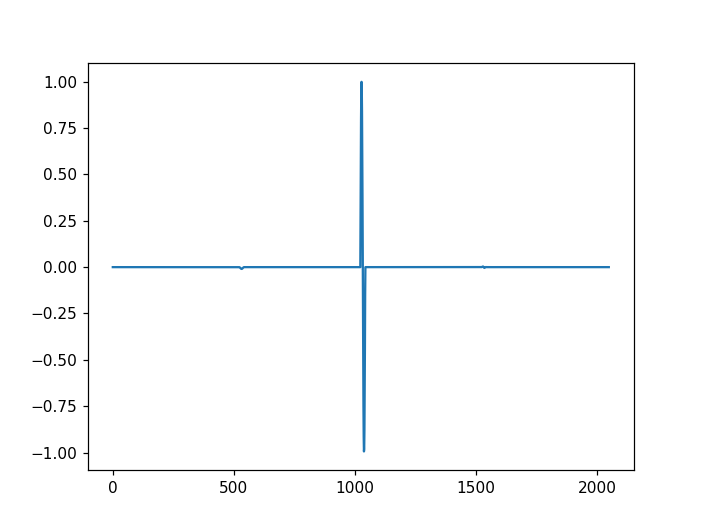

In [48]:
x = inverse_cepstrum(cep, len(signal_distorted))
fig, ax = plt.subplots()
index = np.arange(len(signal_distorted)*2+1)-len(signal_distorted)
ax.plot(np.real(x))
# ax.set_xlim([-10,len(signal_distorted)])

In [ ]:
h = [
    0.000000000000000000,
    0.000000017674467274,
    0.000000093343209660,
    0.000000184492780302,
    0.000000161960136076,
    -0.000000101700685384,
    -0.000000608873457467,
    -0.000001160955324076,
    -0.000001398915122806,
    -0.000000970830501527,
    0.000000239729614867,
    0.000001944539158947,
    0.000003457797831990,
    0.000003927613279392,
    0.000002729824787889,
    -0.000000139334184563,
    -0.000003873892685115,
    -0.000007018588902218,
    -0.000007985439135297,
    -0.000005761030134065,
    -0.000000512808238672,
    0.000006210037765048,
    0.000011858426086066,
    0.000013793016429407,
    0.000010417644466156,
    0.000002076799164122,
    -0.000008719981191122,
    -0.000017964341631194,
    -0.000021572823782887,
    -0.000017086209754397,
    -0.000004967501702394,
    0.000011113315724123,
    0.000025284367476479,
    0.000031542445827615,
    0.000026186620077817,
    0.000009661672839021,
    -0.000013030056307529,
    -0.000033714301258340,
    -0.000043904817309731,
    -0.000038169418544903,
    -0.000016703609089950,
    0.000014028203471091,
    0.000043082491589479,
    0.000058835413876092,
    0.000053509985043355,
    0.000026708686984054,
    -0.000013571666695043,
    -0.000053133077097525,
    -0.000076466478546300,
    -0.000072699326393244,
    -0.000040364227264446,
    0.000011019211276145,
    0.000063508212964174,
    0.000096868508184505,
    0.000096231307333793,
    0.000058427188123672,
    -0.000005615091837673,
    -0.000073729895022319,
    -0.000120029352742282,
    -0.000124586299454792,
    -0.000081718296090323,
    -0.000003517997949424,
    0.000083182039371612,
    0.000145831394542989,
    0.000158211369399475,
    0.000111112350087436,
    0.000017383097536500,
    -0.000091093490103334,
    -0.000174027368260113,
    -0.000197497270431504,
    -0.000147524580331821,
    -0.000037109813273445,
    0.000096522604915290,
    0.000204215447432496,
    0.000242752635262978,
    0.000191893103859249,
    0.000063951487935685,
    -0.000098344004658371,
    -0.000235814253444796,
    -0.000294175884995986,
    -0.000245157686531668,
    -0.000099278545473012,
    0.000095237965257000,
    0.000268038431113872,
    0.000351825460985540,
    0.000308235190889052,
    0.000144568044250161,
    -0.000085682776344621,
    -0.000299875374583970,
    -0.000415589045004325,
    -0.000381992253369856,
    -0.000201389691806224,
    0.000067950187535566,
    0.000330063571006688,
    0.000485152449580963,
    0.000467215886464472,
    0.000271388817854034,
    -0.000040103806785666,
    -0.000357072849325109,
    -0.000559968825503280,
    -0.000564582834781544,
    -0.000356267069150882,
    0.000000000000000000,
    0.000379086567188052,
    0.000639228736784123,
    0.000674628622829238,
    0.000457761881715600,
    0.000054709542608631,
    -0.000393985426608635,
    -0.000721831482282828,
    -0.000797717311354763,
    -0.000577626108429096,
    -0.000126574875827894,
    0.000399332157996511,
    0.000806357781220160,
    0.000934013024160004,
    0.000717609545602639,
    0.000218346385330748,
    -0.000392355721425728,
    -0.000891043563949812,
    -0.001083454315419111,
    -0.000879444533055912,
    -0.000332977503150571,
    0.000369932894633602,
    0.000973754085289388,
    0.001245732416993019,
    0.001064838336996477,
    0.000473635121429700,
    -0.000328564071697375,
    -0.001051956852448155,
    -0.001420274335814933,
    -0.001275475727275608,
    -0.000643722565988472,
    0.000264338659728257,
    0.001122690848670230,
    0.001606231664317567,
    0.001513036135232848,
    0.000846921806882122,
    -0.000172883429618259,
    -0.001182528099572118,
    -0.001802475824738572,
    -0.001779231198252713,
    -0.001087264227906447,
    0.000049284213671865,
    0.001227521543109830,
    0.002007600294997556,
    0.002075870651115886,
    0.001369243265247450,
    0.000112033120923454,
    -0.001253130038013219,
    -0.002219930164953417,
    -0.002404967903793875,
    -0.001697988438534492,
    -0.000317483439239228,
    0.001254106505137637,
    0.002437539153562620,
    0.002768902108036984,
    0.002079530284824046,
    0.000574597025856419,
    -0.001224327438875570,
    -0.002658273986956554,
    -0.003170662601309656,
    -0.002521202273139414,
    -0.000892438919617230,
    0.001156529139865730,
    0.002879785802527176,
    0.003614217188255810,
    0.003032254181043980,
    0.001282255538421332,
    -0.001041893792493339,
    -0.003099568012861988,
    -0.004105073302876389,
    -0.003624801897783347,
    -0.001758488278790360,
    0.000869388582100595,
    0.003314999843930984,
    0.004651151837518153,
    0.004315332050960656,
    0.002340400145928936,
    -0.000624686036084348,
    -0.003523394562156507,
    -0.005264190982231695,
    -0.005127161016103519,
    -0.003054769695199278,
    0.000288345509384233,
    0.003722051232176566,
    0.005962095003363530,
    0.006094618813228220,
    0.003940537954185555,
    0.000167375163738838,
    -0.003908308707689030,
    -0.006773068749455177,
    -0.007270538872902449,
    -0.005057250176546253,
    -0.000784408306269395,
    0.004079600457095279,
    0.007743368494778774,
    0.008740550658111799,
    0.006501435307604293,
    0.001630510645137227,
    -0.004233508767808354,
    -0.008953025841236662,
    -0.010652667831803278,
    -0.008441202438653483,
    -0.002824371510139108,
    0.004367816860658577,
    0.010551164349900416,
    0.013285435069264242,
    0.011198022102372415,
    0.004596641636584127,
    -0.004480557479862702,
    -0.012846993651529364,
    -0.017229593671812631,
    -0.015472819246661437,
    -0.007465443225598094,
    0.004570056603945451,
    0.016595669026830785,
    0.023988875352480021,
    0.023137260872175526,
    0.012890594009888946,
    -0.004634971046638169,
    -0.024236824301284213,
    -0.038833585763663969,
    -0.041416168665346094,
    -0.027198992583646758,
    0.004674318880406848,
    0.050421679452207074,
    0.102189477071765122,
    0.149805605278358484,
    0.183271491006525511,
    0.195312575573019065,
    0.183271491006525511,
    0.149805605278358484,
    0.102189477071765122,
    0.050421679452207074,
    0.004674318880406848,
    -0.027198992583646758,
    -0.041416168665346094,
    -0.038833585763663969,
    -0.024236824301284217,
    -0.004634971046638169,
    0.012890594009888949,
    0.023137260872175533,
    0.023988875352480024,
    0.016595669026830788,
    0.004570056603945452,
    -0.007465443225598094,
    -0.015472819246661437,
    -0.017229593671812631,
    -0.012846993651529364,
    -0.004480557479862702,
    0.004596641636584126,
    0.011198022102372415,
    0.013285435069264242,
    0.010551164349900418,
    0.004367816860658577,
    -0.002824371510139108,
    -0.008441202438653485,
    -0.010652667831803280,
    -0.008953025841236664,
    -0.004233508767808354,
    0.001630510645137227,
    0.006501435307604293,
    0.008740550658111799,
    0.007743368494778776,
    0.004079600457095280,
    -0.000784408306269395,
    -0.005057250176546253,
    -0.007270538872902450,
    -0.006773068749455179,
    -0.003908308707689030,
    0.000167375163738838,
    0.003940537954185554,
    0.006094618813228220,
    0.005962095003363530,
    0.003722051232176567,
    0.000288345509384233,
    -0.003054769695199279,
    -0.005127161016103519,
    -0.005264190982231696,
    -0.003523394562156508,
    -0.000624686036084348,
    0.002340400145928937,
    0.004315332050960655,
    0.004651151837518153,
    0.003314999843930984,
    0.000869388582100595,
    -0.001758488278790360,
    -0.003624801897783347,
    -0.004105073302876389,
    -0.003099568012861988,
    -0.001041893792493339,
    0.001282255538421333,
    0.003032254181043981,
    0.003614217188255810,
    0.002879785802527178,
    0.001156529139865731,
    -0.000892438919617231,
    -0.002521202273139414,
    -0.003170662601309657,
    -0.002658273986956554,
    -0.001224327438875570,
    0.000574597025856420,
    0.002079530284824046,
    0.002768902108036984,
    0.002437539153562621,
    0.001254106505137636,
    -0.000317483439239228,
    -0.001697988438534492,
    -0.002404967903793874,
    -0.002219930164953419,
    -0.001253130038013220,
    0.000112033120923455,
    0.001369243265247451,
    0.002075870651115887,
    0.002007600294997555,
    0.001227521543109830,
    0.000049284213671865,
    -0.001087264227906447,
    -0.001779231198252715,
    -0.001802475824738572,
    -0.001182528099572119,
    -0.000172883429618259,
    0.000846921806882122,
    0.001513036135232848,
    0.001606231664317567,
    0.001122690848670230,
    0.000264338659728257,
    -0.000643722565988473,
    -0.001275475727275608,
    -0.001420274335814935,
    -0.001051956852448155,
    -0.000328564071697375,
    0.000473635121429700,
    0.001064838336996477,
    0.001245732416993020,
    0.000973754085289388,
    0.000369932894633602,
    -0.000332977503150571,
    -0.000879444533055913,
    -0.001083454315419111,
    -0.000891043563949813,
    -0.000392355721425729,
    0.000218346385330747,
    0.000717609545602639,
    0.000934013024160004,
    0.000806357781220160,
    0.000399332157996512,
    -0.000126574875827894,
    -0.000577626108429096,
    -0.000797717311354764,
    -0.000721831482282828,
    -0.000393985426608635,
    0.000054709542608631,
    0.000457761881715600,
    0.000674628622829239,
    0.000639228736784123,
    0.000379086567188052,
    0.000000000000000000,
    -0.000356267069150882,
    -0.000564582834781544,
    -0.000559968825503281,
    -0.000357072849325109,
    -0.000040103806785666,
    0.000271388817854034,
    0.000467215886464471,
    0.000485152449580963,
    0.000330063571006689,
    0.000067950187535567,
    -0.000201389691806224,
    -0.000381992253369856,
    -0.000415589045004325,
    -0.000299875374583971,
    -0.000085682776344621,
    0.000144568044250161,
    0.000308235190889052,
    0.000351825460985540,
    0.000268038431113872,
    0.000095237965257000,
    -0.000099278545473012,
    -0.000245157686531668,
    -0.000294175884995986,
    -0.000235814253444797,
    -0.000098344004658371,
    0.000063951487935686,
    0.000191893103859248,
    0.000242752635262978,
    0.000204215447432496,
    0.000096522604915290,
    -0.000037109813273445,
    -0.000147524580331821,
    -0.000197497270431505,
    -0.000174027368260113,
    -0.000091093490103334,
    0.000017383097536500,
    0.000111112350087436,
    0.000158211369399475,
    0.000145831394542989,
    0.000083182039371612,
    -0.000003517997949424,
    -0.000081718296090323,
    -0.000124586299454792,
    -0.000120029352742282,
    -0.000073729895022319,
    -0.000005615091837673,
    0.000058427188123672,
    0.000096231307333793,
    0.000096868508184505,
    0.000063508212964175,
    0.000011019211276145,
    -0.000040364227264446,
    -0.000072699326393244,
    -0.000076466478546301,
    -0.000053133077097525,
    -0.000013571666695043,
    0.000026708686984055,
    0.000053509985043355,
    0.000058835413876092,
    0.000043082491589479,
    0.000014028203471091,
    -0.000016703609089950,
    -0.000038169418544903,
    -0.000043904817309731,
    -0.000033714301258340,
    -0.000013030056307529,
    0.000009661672839021,
    0.000026186620077817,
    0.000031542445827615,
    0.000025284367476479,
    0.000011113315724123,
    -0.000004967501702394,
    -0.000017086209754397,
    -0.000021572823782887,
    -0.000017964341631194,
    -0.000008719981191122,
    0.000002076799164122,
    0.000010417644466156,
    0.000013793016429407,
    0.000011858426086066,
    0.000006210037765048,
    -0.000000512808238672,
    -0.000005761030134065,
    -0.000007985439135297,
    -0.000007018588902218,
    -0.000003873892685115,
    -0.000000139334184563,
    0.000002729824787889,
    0.000003927613279392,
    0.000003457797831990,
    0.000001944539158947,
    0.000000239729614867,
    -0.000000970830501527,
    -0.000001398915122806,
    -0.000001160955324076,
    -0.000000608873457467,
    -0.000000101700685384,
    0.000000161960136076,
    0.000000184492780302,
    0.000000093343209660,
    0.000000017674467274,
    0.000000000000000000,
]